In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt

In [2]:
# Loading Dataset
df = pd.read_csv("train.csv")

# Some basic stats on the target variable
print('# startup failed = {}'.format(len(df[df['failure'] == 1])))
print('# startup succeed = {}'.format(len(df[df['failure'] == 0])))
print('% startup failed = {}%'.format(round(float(len(df[df['failure'] == 1])) / len(df) * 100), 3))


# startup failed = 1309
# startup succeed = 4935
% startup failed = 21%


In [3]:
# Prepend string prior to encoding
df['attr1'] = '1_' + df['attr1'].astype(str)
df['attr4'] = '4_' + df['attr4'].astype(str)

# Create 'attr1' dummies and join
one_hot_attr1 = pd.get_dummies(df['attr1'])
df = df.join(one_hot_attr1)

# Create 'attr4' dummies and join
one_hot_attr4 = pd.get_dummies(df['attr4'])
df = df.join(one_hot_attr4)

df = df.drop(['index', 'attr1', 'attr4', 'attr10', 'attr12'], axis=1)

In [4]:
# Randomly, split the data into test/training/validation sets
train, test, validate = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

# Separate target and predictors
y_train = train['failure']
x_train = train.drop(['failure'], axis=1)
y_test = test['failure']
x_test = test.drop(['failure'], axis=1)
y_validate = validate['failure']
x_validate = validate.drop(['failure'], axis=1)

In [5]:
def trainModel(n):
    knn_model = KNeighborsClassifier(n_neighbors=n)
    model = knn_model.fit(x_train, y_train)
    return model

In [6]:
nScore = []

for n in range(2,10):
    model = trainModel(n)
    prediction = model.predict(x_test)
    nScore.append(f1_score(y_test,prediction))

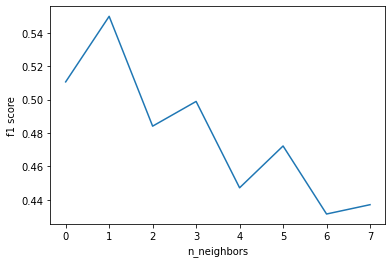

In [7]:
plt.plot(nScore)
plt.ylabel("f1 score")
plt.xlabel("n_neighbors")
plt.show()

In [8]:
asm_test_ori = pd.read_csv('assignment-test.csv')

# Prepend string prior to encoding
asm_test_ori['attr1'] = '1_' + asm_test_ori['attr1'].astype(str)
asm_test_ori['attr4'] = '4_' + asm_test_ori['attr4'].astype(str)

# Create 'attr1' dummies and join
one_hot_attr1 = pd.get_dummies(asm_test_ori['attr1'])
asm_test_ori = asm_test_ori.join(one_hot_attr1)

# Create 'attr4' dummies and join
one_hot_attr4 = pd.get_dummies(asm_test_ori['attr4'])
asm_test_ori = asm_test_ori.join(one_hot_attr4)

asm_test = asm_test_ori.drop(['index', 'attr1', 'attr4', 'attr17'], axis=1)

In [9]:
scaler = StandardScaler()
scaler.fit(asm_test)
asm_test = scaler.transform(asm_test)

In [10]:
y = df['failure']
X = df.drop(['failure'], axis=1)
print(X)

      attr2   attr3   attr5   attr6   attr7    attr8    attr9   attr11  \
0         1  7370.0  1.0765  0.3440  0.9668  12.2879  -3.2781   6.0656   
1         1  7311.0  0.9491  0.4979  0.9931  26.4671  12.5153  14.4181   
2         1  7311.0  1.1346  0.4562  0.9971   9.7338   9.7510  12.5399   
3         0  3663.0  1.4592  0.2219  0.3824  29.2791   2.0565   2.0565   
4         1  6798.0  1.1802  0.6234  1.6704  65.4186  30.7321  60.0642   
...     ...     ...     ...     ...     ...      ...      ...      ...   
6239      0  1400.0  3.7870  0.4209  0.7317  17.6237   9.3959  19.5152   
6240      1  4011.0  0.7914  0.3449  0.6053  51.2813  36.6242  45.8913   
6241      1  3823.0  1.1467  0.2896  0.5483  55.8451  25.3078  30.5575   
6242      0  1600.0  1.7069  0.5589  1.2902  11.4641   2.9564   9.3495   
6243      1  3672.0  1.2652  0.5098  1.0649   6.5853   2.4047   4.5152   

       attr13  attr14  ...  4_C  4_D  4_E  4_F  4_G  4_H  4_I  4_J  4_K  4_L  
0     -4.1982  1.3114  ...    0 

In [11]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X, y)

prediction = pd.DataFrame(knn_model.predict(asm_test))

/Users/me/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 36 features, but KNeighborsClassifier is expecting 35 features as input.

In [ ]:
df_output = asm_test_ori[["index"]]
df_output2 = df_output.assign(failure = prediction)
df_output2 = df_output2.set_index("index",drop=True)
df_output2.to_csv("knn.csv")